# Keras
* Environment require **Python 3+**
* Guide of how to do Deep learning with Keras module
---

## Before as a Deep Leaner... You Should Know...
---
## Artificial Neural Networks
## DNN - Deep Neural Network
* Fully Connected Neural Network 
* CNN (Convolution Neural Network)
* RNN (Recurrent Neural Network)
    * LSTM (Long Short-Term Memory)
    * GRU (Gated Recurrent Unit)

## Shopping Windows of Deep Leanrning
---

### Layers
   * Input 
   * Hidden
   * Output
<img src="https://content-static.upwork.com/blog/uploads/sites/3/2017/06/27095907/image-26.png"></img>
   
### [Weight Initializer](https://keras.io/initializers/#usage-of-initializers)

### [Activation Function](https://keras.io/activations/)
  * Sigmoid 
      * ★ **act='sigmoid'**
  * Relu, Elu 
      * ★ **act='relu'**
  * Elu 
      * ★ **act='elu'**
  * Hyperbolic Tangent 
      * ★ **act='tanh'**
  * Softmax 
      * ★ **act='softmax'**... 
  

### Learning Rate
  * Learning Rate Scheduling
  * Auto Learning Rate

       
### [Gradient Optimizer](https://keras.io/optimizers/)
  * SDG 
      * ★ **optimizer=SGD()**
  * Momenetum Optmization 
      * ★ **optimizer=SGD(momentum=0.5)**
  * NAG (Nesterove Accelerated Gradient) 
      * ★ **optimizer=SGD(momentum=0.5, nesterov=True)**
  * AdaGrad 
      * ★ **optimizer='Adagrad'**
  * RMSProp 
      * ★ **optimizer=RMSprop()**
  * Adam
      * ★ **optimizer='Adam'**
  
### Batch Size
### Epoch

### [Loss & Cost](https://keras.io/losses/#usage-of-loss-functions)
   * binary_crossentropy 
       * ★ **loss='binary_crossentropy'**
   * categorical_crossentropy 
       * ★ **loss='categorical_crossentropy'**
   * mean_squared_error 
       * ★ **loss='mean_squared_error'**
       
### [Accuracy](https://keras.io/metrics/#usage-of-metrics)...

### Conquer Over Fitting
   * [Drop Out](https://keras.io/layers/core/#dropout) 
       * ★ **Dropout(0.5)**
   * [Early Stopping](https://keras.io/callbacks/)
   * [l1 & l2 Weight Regularization](https://keras.io/regularizers/)
   * [Max-Norm Regularization](https://keras.io/constraints/#available-constraints)
   * [Data Augmentation](https://keras.io/preprocessing/image/)

## Others
* Reusing Pretrained Layers
* Freezing Lower Layer

In [ ]:
...

# Let's Keras

In [376]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils

In [377]:
def plot_AccLoss(his):
    for k, v in his.history.items():
        if (k == 'acc') | (k == 'val_acc'):
            plt.subplot(211)
            v = np.array(historyA.history[k])*100
            if k == 'acc': 
                label = 'Train Acc. = {}'.format(v[-1])
                plt.plot(range(len(v)), v, label=label, color='red')
            if k == 'val_acc': 
                label = 'Validation Acc. = {}'.format(v[-1])
                plt.plot(range(len(v)), v, label=label, color='green')
            plt.xlabel("Epochs")
            plt.ylabel("Accuracy %")
            plt.legend()
        if (k == 'loss') | (k == 'val_loss'):
            plt.subplot(212)
            v = historyA.history[k]
            if k == 'loss': 
                label = 'Train Loss. = {}'.format(v[-1])
                plt.plot(range(len(v)), v, label=label, color='red')
            if k == 'val_loss': 
                label = 'Validation Loss. = {}'.format(v[-1])
                plt.plot(range(len(v)), v, label=label, color='green')
            plt.xlabel("Epochs")
            plt.ylabel("Loss %")
            plt.legend()
        plt.tight_layout()

## DNN - Deep Neural Network

* Load Data Set

In [374]:
# load dataset
var = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('DataBase/ForModelCamparison.csv', names=var)
array = df.values

X = array[:,0:8]
y = np_utils.to_categorical(array[:,8])

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.20)
print('★ Training size : Testing size = ', len(ytr), ':', len(yte))
print('\tDimension of Xtr = ', Xtr.ndim)
print('\tShape of Xtr = ', Xtr.shape)
print('\tDimension of ytr = ', ytr.ndim)
print('\tShape of ytr = ', ytr.shape)

★ Training size : Testing size =  614 : 154
	Dimension of Xtr =  2
	Shape of Xtr =  (614, 8)
	Dimension of ytr =  2
	Shape of ytr =  (614, 2)


 32/154 [=====>........................] - ETA: 6s
Test set accuracy:  60.3896107767
Test set loss:  0.671408342077


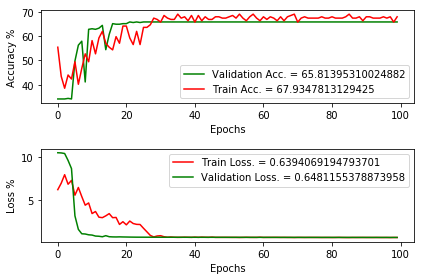

In [375]:
modelA = Sequential()

modelA.add(Dense(6, input_dim=8))
modelA.add(Activation('relu'))
modelA.add(Dropout(0.5))

modelA.add(Dense(4))
modelA.add(Activation('relu'))
modelA.add(Dropout(0.5))

modelA.add(Dense(2))
modelA.add(Activation('softmax'))

modelA.compile(loss='categorical_crossentropy',
               optimizer=SGD(momentum=0.5, nesterov=True),
               metrics=['accuracy'])

historyA = modelA.fit(Xtr, ytr, epochs=100,
                      batch_size=200, verbose=0,
                      validation_split=0.7)

resultA = modelA.evaluate(Xte, yte, verbose=0)
resultA_prob = modelA.predict_proba(Xte)

print('\nTest set accuracy: ', resultA[1]*100)
print('Test set loss: ', resultA[0])

plot_AccLoss(historyA)

## CNN - Convolution Neural Network
* [Convolution Layer](https://keras.io/layers/convolutional/)
* [Pooling Layer](https://keras.io/layers/pooling/)
* Padding/Stride

In [ ]:
L9a

## RNN - Recurrent Neural Network

## GRU - Gated Recurrent Unit

## LSTM - Long Short-Term Memory

In [ ]:
Lab07